# Data Analysis to Predict Anxiety Disorders in Childern

## Project description
This project anayzes behavioral, psychophysiological, and demographic data collected from preschool children (3-5 years old) to predict the risk of anxiety disorders, including Separation Anxiety (SAD) and Gnerealized Anziety (GAD). Is uses machine learning algorithms, such as Random Forest, to build robust predictive models.
Results include assessment metrics, ROC curves, confusion matrices, and feature importance. Results are exported from the research paper "Quantifying Risk for Anxiety Disorders in Preschool Children: A Machine Learning Approach".

## Main Features
- **Data processing**: Null value imputation, feature scaling.
- **Hyperparameter optimization**: Grid search to improve model performance.
- **Model evaluation**: Metric such as Accuracy, Precision, Recall, F1 Score, and AUC.
- **Visualizations**: ROC curves and confusion matrices.

## Requirements
### Required Libraries:
- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `openpyxl`

## Instalation
Run the following command to install the dependencies:
```bash
pip install numpy pandas matplotlib seaborn scikit-learn openpyxl
```

## Project Structure
- `Training_Data.xlsx`: Input data file.
- `anxiety_ml_analysis.py`: Main code for analysis.
- `Resultados_Modelo_SAD_GAD.xlsx`: Generated results (Accuracy, Precision, Recall, F1 Score, and AUC for SAD and GAD)

## Code execution

1. Make sure that the `Training_Data.xlsx` file is in the same folder as the script.
2. Execute the code in a Python environment:
   ```bash
   python anxiety_ml_analysis.py
   ```
3. Check results:
   - Evaluation mectris and visualizations are printed and displayed during execution.
   - The final results are stored in `Resultados_Modelo_SAD_GAD.xlsx`.

## Generated results
1. ROC curves: Visualizations to evaluate the classification ability of models for SAD and GAD.
2. Confusion Matrices: Tables to analyze false positives, false negatives, true positives and tru negatives.
3. Evaluation Metrics:
- Accuracy
- Precision
- Recall
- F1 Score
- AUC (Area Under the Cure)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    roc_auc_score, roc_curve, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# checks if the data file exists at the specified path. If not, raises an error.
data_path = '/Users/Augusto/Desktop/ansiexty disorder/Training_Data.xlsx'
if not os.path.exists(data_path):
    raise FileNotFoundError("The file was not found in the specified path.")

In [3]:
# Carga de datos
df = pd.read_excel(data_path)

In [4]:
# Initial data analysis
print("Initial data summary:")
print(df.describe())
print(df.info())
print("Missing values per column:")
print(df.isnull().sum())

Initial data summary:
       Irritability  \
count    916.000000   
mean       0.283843   
std        0.712266   
min        0.000000   
25%        0.000000   
50%        0.000000   
75%        0.000000   
max        3.000000   

       Increased unnecessary whole body movements in specific situations  \
count                                         900.000000                   
mean                                            0.384444                   
std                                             0.884285                   
min                                             0.000000                   
25%                                             0.000000                   
50%                                             0.000000                   
75%                                             0.000000                   
max                                             3.000000                   

       Difficulty concentrating on tasks or play activity independently  \
count     

In [5]:
# Separation of features and labels
X = df.drop([
    'SAD', 'GAD', "Subject", "Onset Child tries unsuccessfully to leave daycare/school due to anxiety",
    "Onset Has to be taken to daycare/school because of separation anxiety",
    "Onset Fear about calamitous separation",
    "Onset Child leaves daycare/school due to anxiety"
], axis=1)
y_SAD = df['SAD']
y_GAD = df['GAD']

In [6]:
# Function to create pipelines
def create_pipeline(X, y, model):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols)
        ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    return pipeline

In [7]:
# Pipeline and molde optimization
model = RandomForestClassifier(random_state=0)
pipeline_SAD = create_pipeline(X, y_SAD, model)
pipeline_GAD = create_pipeline(X, y_GAD, model)
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [8]:
# Data division for training and testing
X_train_SAD, X_test_SAD, y_train_SAD, y_test_SAD = train_test_split(X, y_SAD, test_size=0.2, random_state=0)
X_train_GAD, X_test_GAD, y_train_GAD, y_test_GAD = train_test_split(X, y_GAD, test_size=0.2, random_state=0)


In [9]:
# Hyperparameter search for SAD
grid_search_SAD = GridSearchCV(pipeline_SAD, param_grid, cv=5, scoring='f1_macro')
grid_search_SAD.fit(X_train_SAD, y_train_SAD)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Irritability',
       'Increased unnecessary whole body movements in specific situations',
       'Difficulty concentrating on tasks or play activity independently',
       'Difficulty concen...
       'Worries about competence or performance', 'Worries about appearance',
       'Worries about money/food', 'Other worries', 'Sampling Weight'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [10]:
# Optimized model results for SAD
best_pipeline_SAD = grid_search_SAD.best_estimator_
y_pred_SAD = best_pipeline_SAD.predict(X_test_SAD)

print("Best Hyperparameters SAD:", grid_search_SAD.best_params_)
print("Classification repot SAD:")
print(classification_report(y_test_SAD, y_pred_SAD))

Best Hyperparameters SAD: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Classification repot SAD:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       141
           1       0.89      0.77      0.82        43

    accuracy                           0.92       184
   macro avg       0.91      0.87      0.89       184
weighted avg       0.92      0.92      0.92       184



AUC para SAD: 0.98


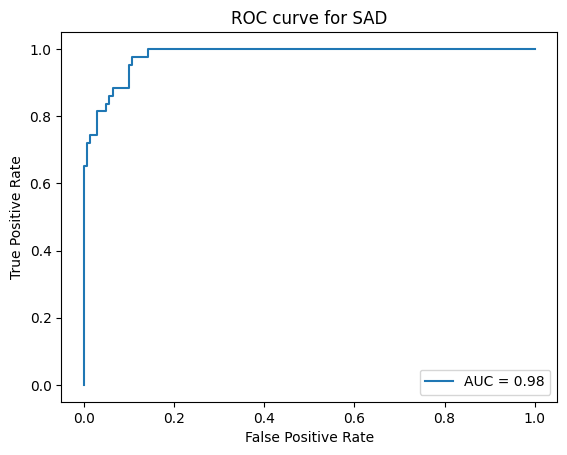

In [12]:
# ROC curve and AUC for SAD
y_pred_prob_SAD = best_pipeline_SAD.predict_proba(X_test_SAD)[:, 1]
auc_sad = roc_auc_score(y_test_SAD, y_pred_prob_SAD)
print(f"AUC para SAD: {auc_sad:.2f}")

fpr_sad, tpr_sad, _ = roc_curve(y_test_SAD, y_pred_prob_SAD)
plt.plot(fpr_sad, tpr_sad, label=f'AUC = {auc_sad:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SAD')
plt.legend()
plt.show()


Confusion Matrix for SAD:
[[137   4]
 [ 10  33]]


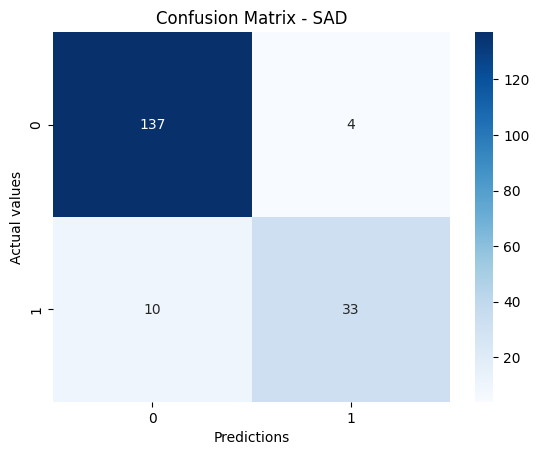

In [13]:
# Confusion Matrix for SAD
conf_matrix_SAD = confusion_matrix(y_test_SAD, y_pred_SAD)
print("Confusion Matrix for SAD:")
print(conf_matrix_SAD)
sns.heatmap(conf_matrix_SAD, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SAD')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()

In [14]:
# Hyperparameter search for GAD
grid_search_GAD = GridSearchCV(pipeline_GAD, param_grid, cv=5, scoring='f1_macro')
grid_search_GAD.fit(X_train_GAD, y_train_GAD)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Irritability',
       'Increased unnecessary whole body movements in specific situations',
       'Difficulty concentrating on tasks or play activity independently',
       'Difficulty concen...
       'Worries about competence or performance', 'Worries about appearance',
       'Worries about money/food', 'Other worries', 'Sampling Weight'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [15]:
# Optimized model results for GAD
best_pipeline_GAD = grid_search_GAD.best_estimator_
y_pred_GAD = best_pipeline_GAD.predict(X_test_GAD)

print("Best hyperparameters  GAD:", grid_search_GAD.best_params_)
print("Classification report GAD:")
print(classification_report(y_test_GAD, y_pred_GAD))

Best hyperparameters  GAD: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Classification report GAD:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       145
           1       0.78      1.00      0.88        39

    accuracy                           0.94       184
   macro avg       0.89      0.96      0.92       184
weighted avg       0.95      0.94      0.94       184



AUC para GAD: 0.97


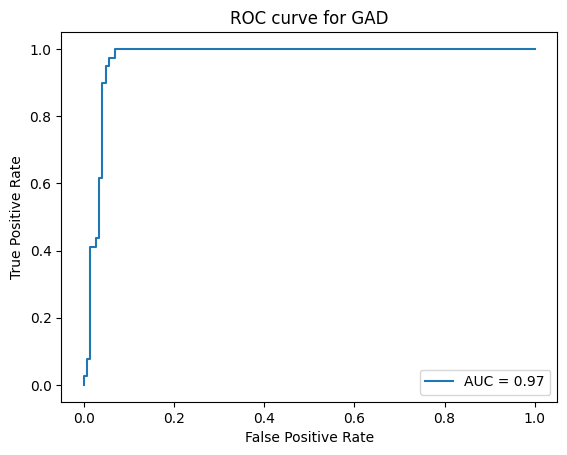

In [16]:
# ROC curve and AUC for GAD
y_pred_prob_GAD = best_pipeline_GAD.predict_proba(X_test_GAD)[:, 1]
auc_gad = roc_auc_score(y_test_GAD, y_pred_prob_GAD)
print(f"AUC para GAD: {auc_gad:.2f}")

fpr_gad, tpr_gad, _ = roc_curve(y_test_GAD, y_pred_prob_GAD)
plt.plot(fpr_gad, tpr_gad, label=f'AUC = {auc_gad:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GAD')
plt.legend()
plt.show()

Confusion Matrix for GAD:
[[134  11]
 [  0  39]]


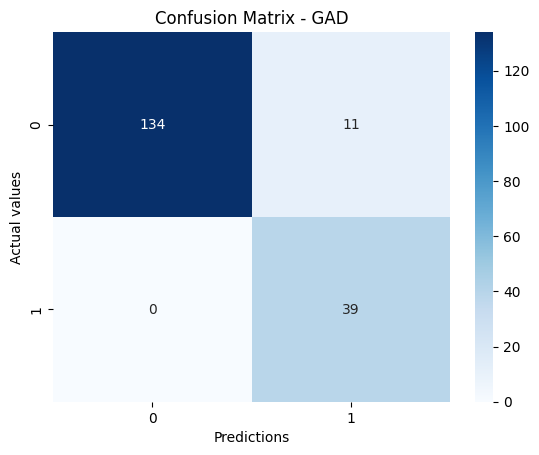

In [17]:
# Confusion matrix for GAD
conf_matrix_GAD = confusion_matrix(y_test_GAD, y_pred_GAD)
print("Confusion Matrix for GAD:")
print(conf_matrix_GAD)
sns.heatmap(conf_matrix_GAD, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GAD')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()


In [18]:
# Results in a file
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'SAD': [
        accuracy_score(y_test_SAD, y_pred_SAD),
        precision_score(y_test_SAD, y_pred_SAD, average='macro'),
        recall_score(y_test_SAD, y_pred_SAD, average='macro'),
        f1_score(y_test_SAD, y_pred_SAD, average='macro'),
        auc_sad
    ],
    'GAD': [
        accuracy_score(y_test_GAD, y_pred_GAD),
        precision_score(y_test_GAD, y_pred_GAD, average='macro'),
        recall_score(y_test_GAD, y_pred_GAD, average='macro'),
        f1_score(y_test_GAD, y_pred_GAD, average='macro'),
        auc_gad
    ]
})
results.to_excel('Model_Results_SAD_GAD.xlsx', index=False)

print("Analysis completed. The results have been saved in 'Model_Results_SAD_GAD.xlsx'.")


Analysis completed. The results have been saved in 'Model_Results_SAD_GAD.xlsx'.
